In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
%matplotlib inline
import soundfile as sf
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/'My Drive'/dataset/IR

Mounted at /content/drive/
/content/drive/My Drive/dataset/IR


In [3]:
data = pd.read_csv('finaldataset.csv')
data.drop('Unnamed: 0', axis='columns', inplace=True)
data.drop('29', axis='columns', inplace=True)

In [ ]:
data

### Visualization of 1 song



#### Load audio file

In [25]:
# y, sr = librosa.load('/content/drive/My Drive/dataset/IR/test.mp3')
audio_data = '/content/drive/My Drive/dataset/IR/test.mp3'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
# librosa.load(audio_data, sr=44100)
# librosa.load(audio_path, sr=None)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


#### Play audio file

In [28]:
ipd.Audio(audio_data)

#### Visualizing audio

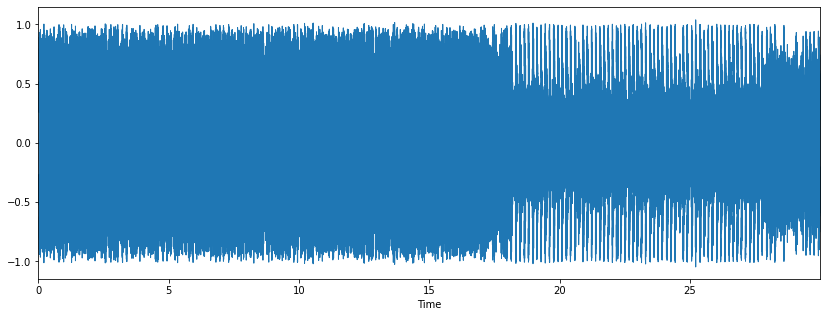

In [30]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#### Spectrogram
##### A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform

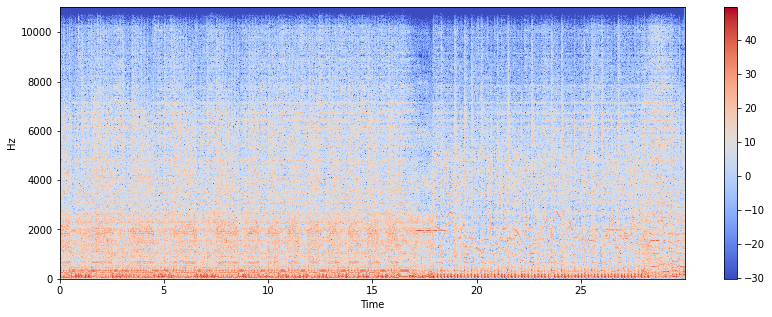

In [31]:
X = librosa.stft(x)   #stft() converts data into short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#### Create an audio signal

In [35]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
# librosa.output.write_wav('tone_220.wav', x, sr)
sf.write('tone_220.wav', x, 48000)

#### Visulization of some features on one song

##### 1. Spectral Centroid

In [38]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(216,)

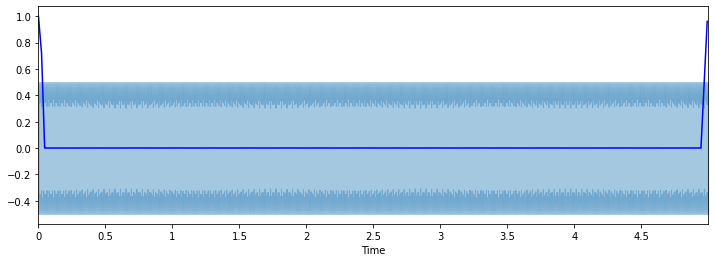

In [39]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

##### 2. Spectral Rolloff

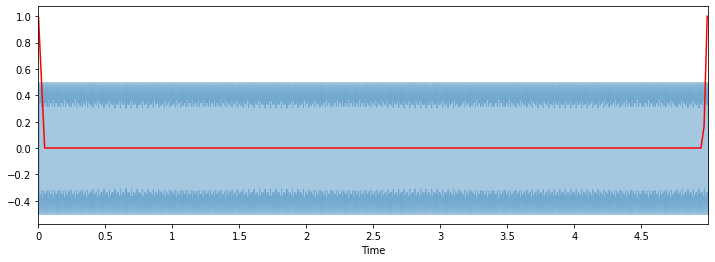

In [41]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

##### 3. Spectral Bandwidth

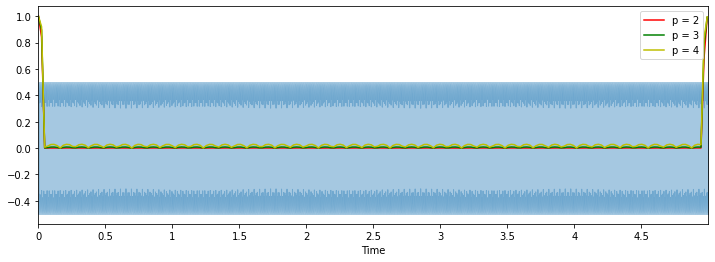

In [43]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

##### 4. Zero-Crossing Rate

<Figure size 1008x360 with 0 Axes>

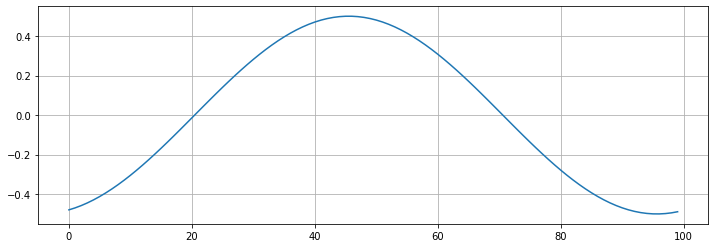

In [48]:
#Plot the signal:
plt.figure(figsize=(14, 5))
# librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(12, 4))
plt.plot(x[n0:n1])
plt.grid()

##### 5. Mel-Frequency Cepstral Coefficients(MFCCs)

(20, 216)


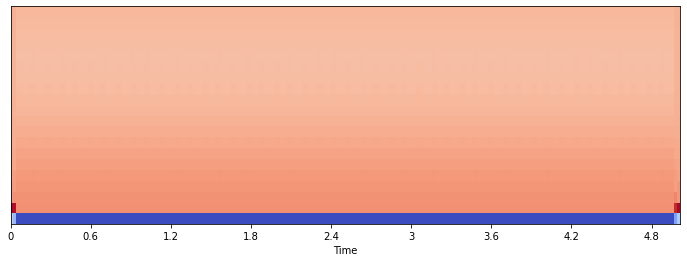

In [51]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

##### 6. Chroma feature

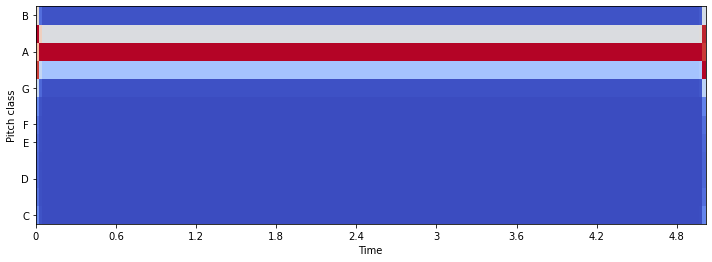

In [54]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

###Correlation matrix of whole dataset

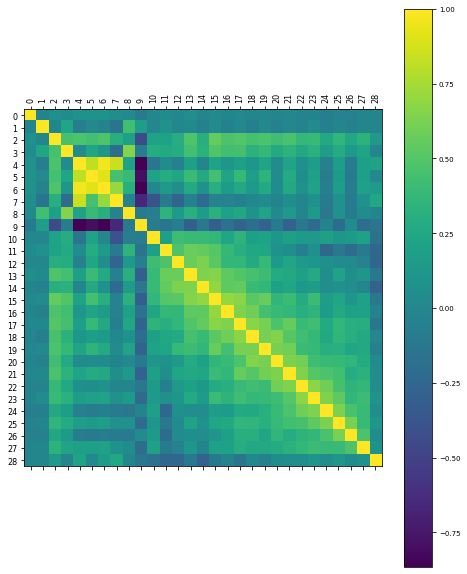

In [10]:
def correlation_matrix(data, filename='output'):
    f = plt.figure(figsize=(8, 10))
    plt.matshow(data.corr(), fignum=f.number)
    plt.xticks(range(data.shape[1]), data.columns, fontsize=8, rotation=90)
    plt.yticks(range(data.shape[1]), data.columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=7)
    plt.show()
    
correlation_matrix(data)

In [12]:
scaler = MinMaxScaler()
data = data.dropna()
X = data.iloc[:, 0:-1]
X_norm = scaler.fit_transform(X)
#X_norm = scaler.transform(X)
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)

### Visualiation of high dimensional data using TSNE plot

#### 2D-plot

In [13]:
def tsne2D(): 
  tsneDatasetOneTwoDimPerp_30 = TSNE().fit_transform(X_norm)

  # plotting the tsne data 
  fig, img = plt.subplots(1,1,figsize=(15,5),sharex='col', sharey='row')
  ax11 = img.scatter(tsneDatasetOneTwoDimPerp_30[:,0],tsneDatasetOneTwoDimPerp_30[:,1], c = y)
  cbar = plt.colorbar(ax11)
  fig.suptitle("Perplexity 30")
  plt.show()
#A feature of t-SNE : “perplexity,” (default 30) - guess about the number of close neighbors each point has

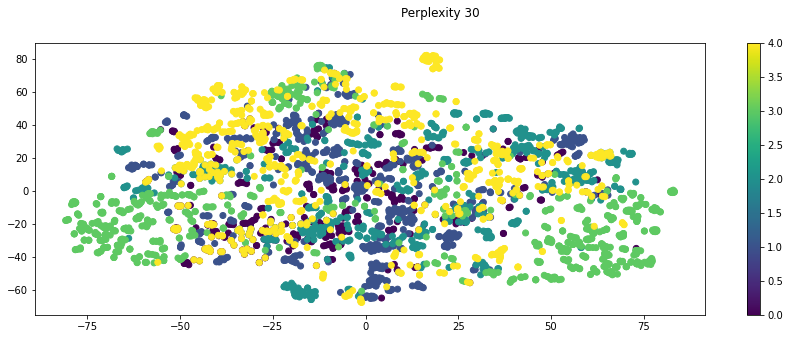

In [15]:
tsne2D()

#### 3D-plot

In [16]:
def tsne2D(): 
  tsneDatasetOneTwoDimPerp_30 = TSNE(n_components=3).fit_transform(X_norm)

# plotting the tsne data 
  fig = plt.figure(figsize = (10, 7))
  ax = plt.axes(projection ="3d")
  ax11 = ax.scatter(tsneDatasetOneTwoDimPerp_30[:,0],tsneDatasetOneTwoDimPerp_30[:,1],tsneDatasetOneTwoDimPerp_30[:,2], c = y)
  cbar = plt.colorbar(ax11)
  fig.suptitle("Perplexity 30")
  plt.show()

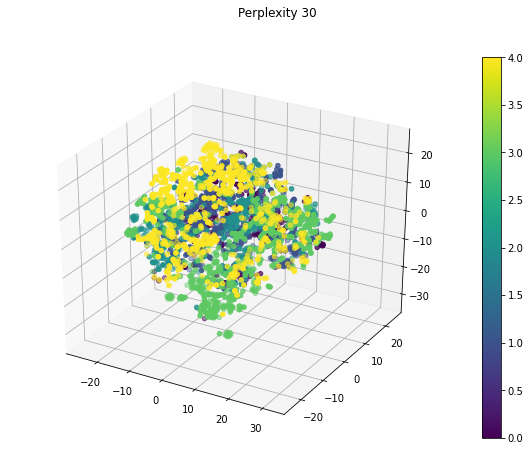

In [17]:
tsne2D()